<a href="https://colab.research.google.com/github/mlokendra/COMPRESSIVE-STRENGTH-OF-CONCRETE-USING-DEEP-LEARNING/blob/master/Full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [0]:
# libray
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Building ANN As a Regressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

In [0]:
df = pd.read_csv("concrete_data.csv")

In [11]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# **NORMALISATION AND PREPROCESSING -:**

*  WCR = water cement ratio
*  FCR = Fine aggregate cement ratio
*   CCR = Coarse Aggregate cement Ratio
*   Binding Ratio





In [0]:
def normalisation(df):  
  df_n=df
  for i in df_n.iloc[0:,0:9]:
      df_n[i]=df_n[i]-min(df_n[i])/(max(df_n[i])-min(df_n[i])) 
      #print(i)
  return df_n


def preproccessing_data(df):
  df_new = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'BFS',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarser_agg',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_agg',
       'Age (day)':'Days','Concrete compressive strength(MPa, megapascals)':'Comp_str'})
  A=df_new['Cement']/df_new['Water']
  df_new['WCR']=A
  A=df_new['Fine_agg']/df_new['Cement']
  df_new['FCR']=A
  A=df_new['Coarser_agg']/df_new['Cement']
  df_new['CCR']=A
  A=df_new['Water']/(df_new['Cement']+df_new['Fly_Ash'])
  df_new['Binder_ratio']=A
  return df_new

In [13]:
df_new =preproccessing_data(df.iloc[0:,0:9])
df_new.head()

,Cement,BFS,Fly_Ash,Water,Superplasticizer,Coarser_agg,Fine_agg,Days,"Concrete compressive strength(MPa, megapascals)",WCR,FCR,CCR,Binder_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.333333,1.251852,1.925926,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.333333,1.251852,1.953704,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,1.458333,1.786466,2.803008,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,1.458333,1.786466,2.803008,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.034375,4.156596,4.926485,0.966767


# **Scatter Diagram and Corelation Matrix**
The scatterplot matrix shows us that there are some features such as ‘Age’ are less evenly distributed than
other features.

AttributeError: ignored

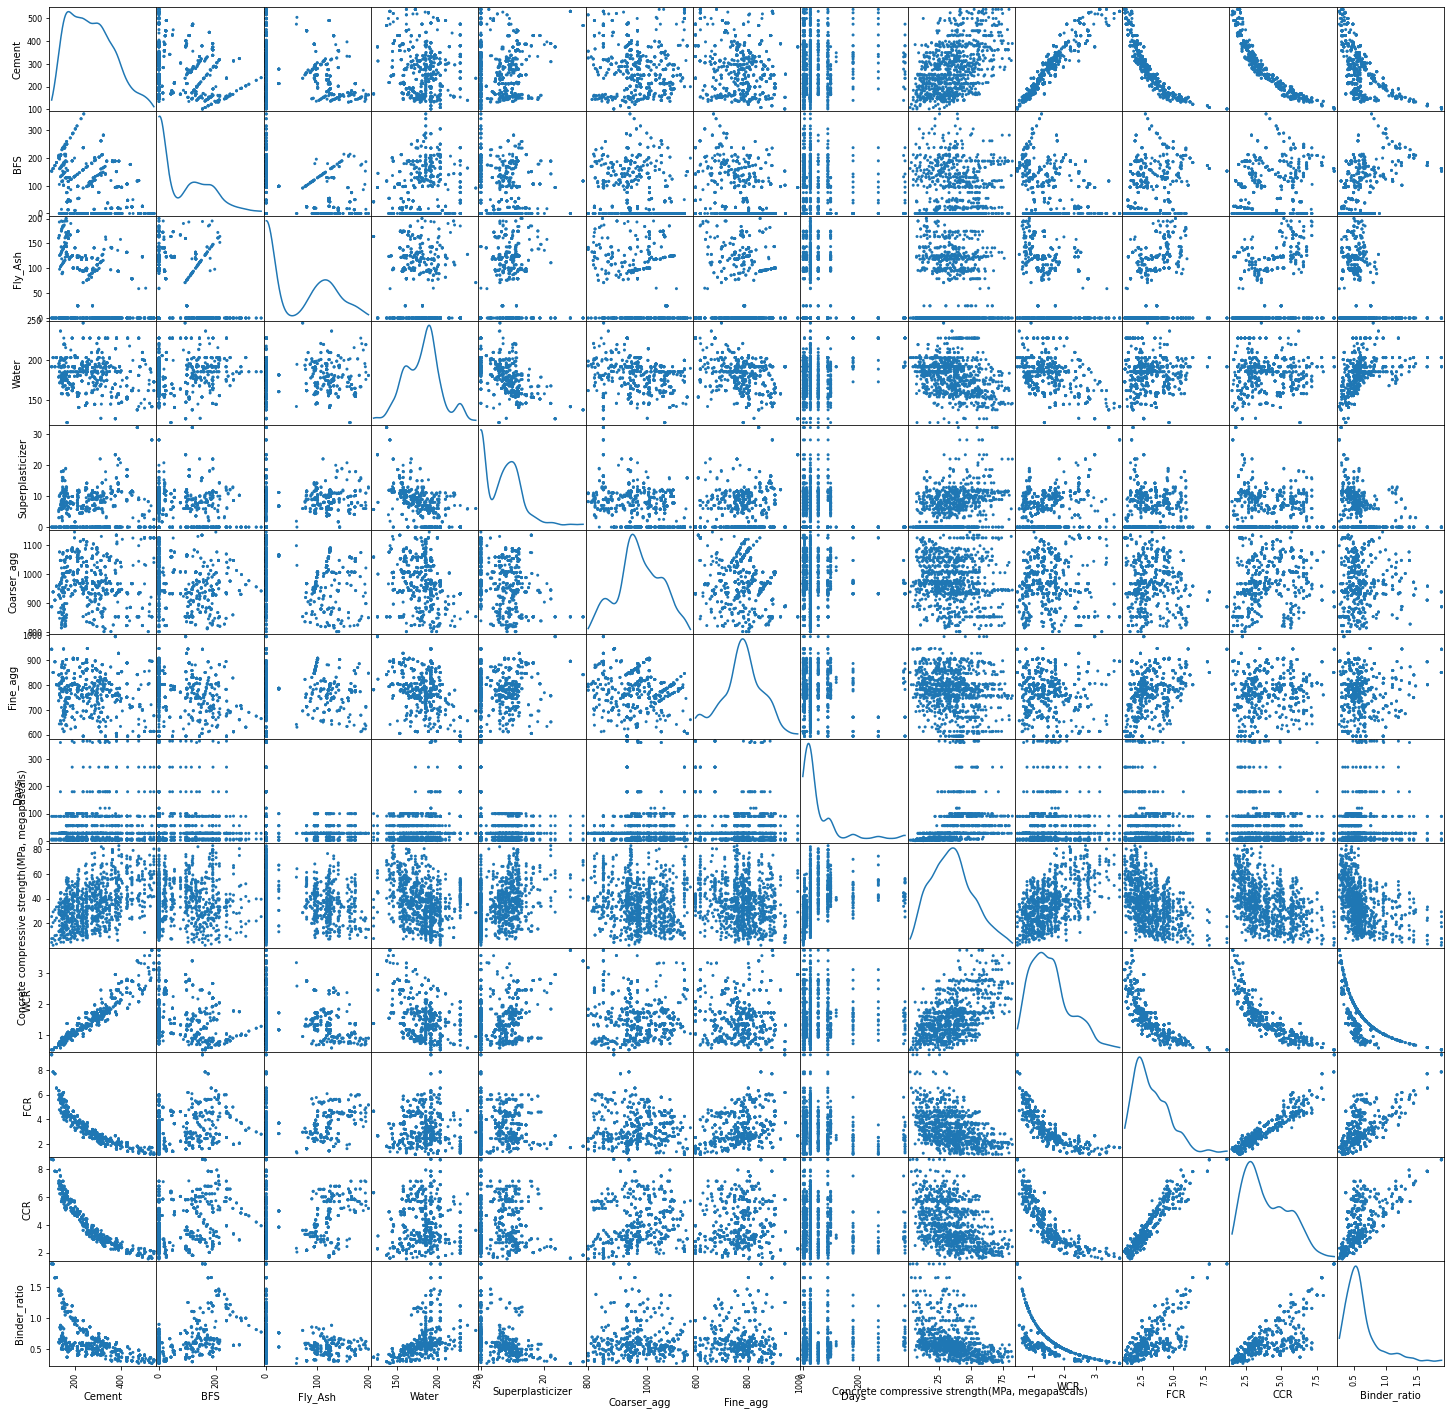

In [14]:
scatterplot_matrix  = pd.plotting.scatter_matrix(df_new, alpha=1.0, figsize=(25, 25), diagonal='kde')
corr = df_new.corr().as_matrix()
for i,j in zip (*plt.np.triu_indices_from(scatterplot_matrix, k=1)):
    scatterplot_matrix[i,j].annotate('%.4f' %corr[i,j], (0.5,0.5), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
plt.show()
import seaborn as sns
corr = df_new.corr() 
sns.heatmap(corr, annot=True, linewidths=3,cmap='Blues')

# **EXTRA FEATHERS PLOT CORREELATION GRAPH**

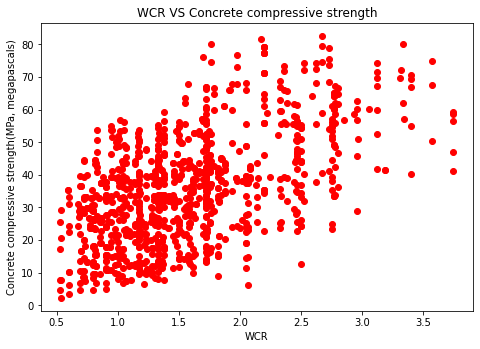

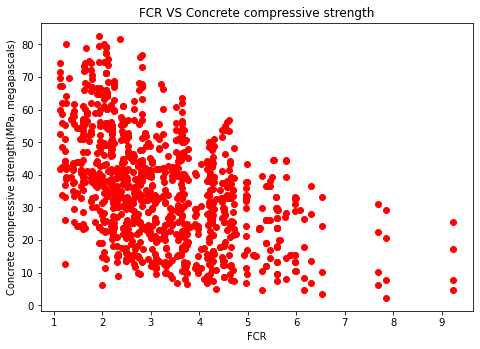

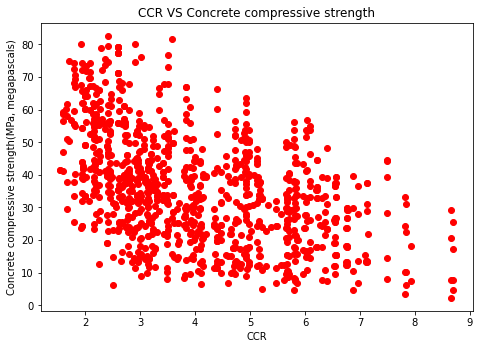

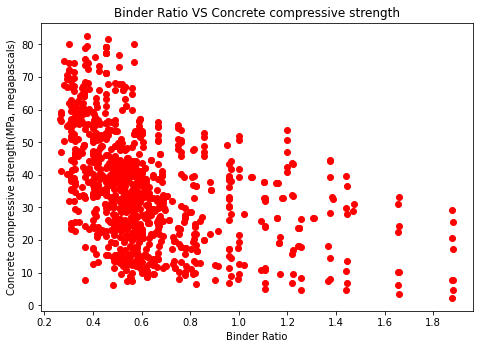

In [18]:
X = df_new['WCR']
Y = df_new['Concrete compressive strength(MPa, megapascals) ']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X,Y, color='r')
#ax.hist(boys_grades, facecolor='blue', alpha=0.5)
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('WCR')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
ax.set_title('WCR VS Concrete compressive strength')
plt.show()



X = df_new['FCR']
Y = df_new['Concrete compressive strength(MPa, megapascals) ']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X,Y, color='r')
#ax.hist(boys_grades, facecolor='blue', alpha=0.5)
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('FCR')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
ax.set_title('FCR VS Concrete compressive strength')
plt.show()


X = df_new['CCR']
Y = df_new['Concrete compressive strength(MPa, megapascals) ']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X,Y, color='r')
#ax.hist(boys_grades, facecolor='blue', alpha=0.5)
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('CCR')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
ax.set_title('CCR VS Concrete compressive strength')
plt.show()



X = df_new['Binder_ratio']
Y = df_new['Concrete compressive strength(MPa, megapascals) ']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X,Y, color='r')
#ax.hist(boys_grades, facecolor='blue', alpha=0.5)
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Binder Ratio')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
ax.set_title('Binder Ratio VS Concrete compressive strength')
plt.show()


In [0]:
features = ['Cement', 'BFS', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarser_agg',
       'Fine_agg', 'Days','WCR','FCR','CCR','Binder_ratio']

LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_new[features], df_new['Concrete compressive strength(MPa, megapascals) '], test_size=0.20, random_state=42)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(25, kernel_initializer='normal',input_dim = 12, activation='relu'))
from keras.utils.vis_utils import plot_model
# The Hidden Layers :
NN_model.add(Dense(51, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()
plot_model(NN_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 25)                325       
_________________________________________________________________
dense_11 (Dense)             (None, 51)                1326      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               6656      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 42,612
Trainable params: 42,100
Non-trainable params: 512
________________________________________________

In [33]:
history1= NN_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 659 samples, validate on 165 samples
Epoch 1/100
659/659 [==============================] - 0s 494us/step - loss: 35.6184 - mean_absolute_error: 35.6184 - val_loss: 35.8788 - val_mean_absolute_error: 35.8788

Epoch 00001: val_loss improved from inf to 35.87876, saving model to Weights-001--35.87876.hdf5
Epoch 2/100
659/659 [==============================] - 0s 79us/step - loss: 35.1092 - mean_absolute_error: 35.1092 - val_loss: 35.1673 - val_mean_absolute_error: 35.1673

Epoch 00002: val_loss improved from 35.87876 to 35.16733, saving model to Weights-002--35.16733.hdf5
Epoch 3/100
659/659 [==============================] - 0s 76us/step - loss: 34.1870 - mean_absolute_error: 34.1870 - val_loss: 33.9790 - val_mean_absolute_error: 33.9790

Epoch 00003: val_loss improved from 35.16733 to 33.97904, saving model to Weights-003--33.97904.hdf5
Epoch 4/100
659/659 [==============================] - 0s 77us/step - loss: 32.7521 - mean_absolute_error: 32.7521 - val_loss: 32.2308 - val_m

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
prediction = NN_model.predict(X_test)
r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_true=y_test, y_pred=prediction)
    
# metrics for true values
# r2 remains unchanged, mse, mea will change and cannot be scaled
# because there is some physical meaning behind it
prediction_true_scale = prediction
y_test_true_scale = y_test
mae_true_scale = mean_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
medae_true_scale = median_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
mse_true_scale = mean_squared_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
print(r2,mse,mae,mae_true_scale,medae_true_scale,mse_true_scale  )    

0.818726491558798 46.70999468546414 4.672704386109287 4.672704386109287 3.130350761413574 46.70999468546414


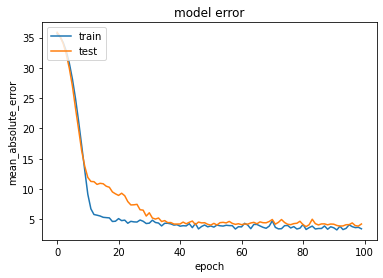

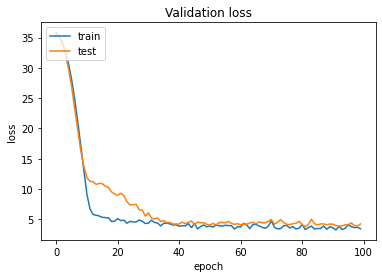

In [36]:
plt.plot(history1.history['mean_absolute_error'])
plt.plot(history1.history['val_loss'])
plt.title('model error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()